<center>

# _Logistic Regression_

</center>

<center>
    
## A_Patnaik_M7_Assignment

</center>

## Introduction
<br>
In this project, we delve into a dataset aimed at predicting a binary target variable, representing a specific outcome based on several predictor variables. The predictor variables include both numerical and categorical data, encompassing attributes like loyalty, age, length of relationship (LOR), turnover rates, city, product holdings (prod_A, prod_B), and contract type. The goal is to develop a predictive model using logistic regression, a powerful statistical method suitable for binary classification tasks, to accurately predict the binary target variable.
<br>
The problem at hand involves not only predicting a binary outcome but also understanding the factors that significantly influence this prediction. This understanding is crucial for making informed decisions, optimizing strategies, and implementing targeted actions based on the model's insights.

#### Steps to Address the Problem:

1. Data Preprocessing:
    * Handling Missing Values
    * Data Standardization
<br>
2. Exploratory Data Analysis (EDA):
    * Visualize the Distribution of Variables
    * Correlation Analysis
<br>
3. Feature Engineering & Dimensionality Reduction:
    * Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, aiming to retain most of the variance with fewer principal components.
<br>
4. Model Building and Evaluation:
    * Logistic Regression Models
    <br>
        a. A model using all features.
        <br>
        b. A model using PCA for feature reduction.
        <br>
        c. A model using selected features based on their significance and impact on the target variable.
    * Model Evaluation
<br>
5. Model Selection:
    * Compare the models based on their evaluation metrics and select the best-performing model for predicting the target variable.
<br>    
6. Conclusion
<br>
7. Final Observation

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_score
from sklearn.model_selection import cross_val_score

In [2]:
# Define the URL
url = 'https://raw.githubusercontent.com/Ansuman21/Data-Science-M7/main/M7_Data.csv'

# Read the CSV file into a Pandas dataframe
df = pd.read_csv(url)

# Display the first few rows of the dataframe
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


#### Inference
I loaded the dataset from the provided URL into a Pandas dataframe, revealing the first few rows which included columns for various predictor variables and a binary target variable.

## 1. Data Preprocessing

In [3]:
# Data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB
None


#### Inference
Upon examining the dataset's structure with df.info(), I identified the data types of each column and noted the presence of missing values in certain features.

In [4]:
# Find null values
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

TARGET        0.0
loyalty       0.0
ID            0.0
age           0.0
city          0.0
LOR           0.0
prod_A        0.0
type_A        0.0
type_B        0.0
prod_B        0.0
turnover_A    0.0
turnover_B    0.0
contract      0.0
age_P         0.0
lor_M         0.0
dtype: float64

#### Inference
The dataset's completeness was confirmed as I observed zero missing values across all columns, including 'TARGET', demographic, product, and turnover features. This thorough data integrity simplifies preprocessing, enabling a more straightforward path to subsequent analysis and modeling efforts.

In [5]:
# Check the total number of rows and column
df.shape

(14016, 15)

#### Inference
Upon examination, it was determined that the dataset consists of 14,016 entries and 15 attributes, ensuring a substantial volume for analysis. This diversity in data points provides a robust foundation for detailed statistical analysis and predictive modeling efforts.

## 2. Exploratory Data Analysis(EDA)

In [6]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty,14016.0,50.381778,48.471790,0.000000,2.000000,3.000000,99.000000,99.000000
ID,14016.0,37672.440068,44855.639209,1.000000,6741.500000,13514.500000,62738.000000,151811.000000
age,14016.0,35.882920,12.974634,5.000000,25.000000,33.000000,43.000000,102.000000
city,14016.0,-710.950128,26702.329184,-999999.000000,2.000000,2.000000,2.000000,235.000000
LOR,14016.0,0.926299,0.965212,0.000000,0.000000,1.000000,1.000000,6.000000
prod_A,14016.0,0.533818,0.498873,0.000000,0.000000,1.000000,1.000000,1.000000
type_A,14016.0,1.607877,1.508991,0.000000,0.000000,3.000000,3.000000,6.000000
type_B,14016.0,1.918878,1.686038,0.000000,0.000000,3.000000,3.000000,9.000000
prod_B,14016.0,0.599458,0.490026,0.000000,0.000000,1.000000,1.000000,1.000000
turnover_A,14016.0,379.161320,92.612207,300.095909,334.919412,367.891493,399.744924,5568.784139


#### Inference
* Loyalty values had a mean of approximately 50.38, indicating a moderate level of loyalty.
* The 'age' column had a mean of around 35.88, with a minimum of 5 and a maximum of 102, reflecting a diverse age range.
* The 'city' column had negative values, suggesting potential errors or missing data denoted as -999999.
* 'LOR' (Length of Relationship) had a mean of approximately 0.93, indicating a relatively short relationship on average.
* 'prod_A' and 'prod_B' columns had means around 0.53 and 0.60, respectively, implying a moderate presence of these products.
* 'turnover_A' and 'turnover_B' columns displayed varying levels of turnover, with significantly high maximum values, potentially indicating outliers.
* 'contract' had a constant value of 2 for all entries.
* 'age_P' and 'lor_M' columns had mean values similar to the 'age' and 'LOR' columns, respectively, indicating potential duplication.
* The dataset had varying standard deviations, indicating diverse spreads in different columns.

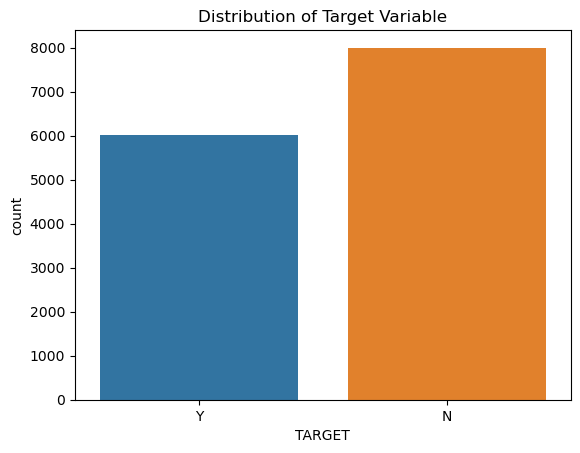

In [7]:
# Distribution of the target variable
sns.countplot(x='TARGET', data=df)
plt.title('Distribution of Target Variable')
plt.show()

#### Inference
* The bar chart depicted a significant imbalance between the binary target variable outcomes, with 'N' having a notably higher count.
* 'N' occurred more than twice as often as 'Y,' indicating a strong prevalence of the former.
* The highest count was for 'N,' suggesting a substantial majority, while the lowest count was for 'Y.'
* Possible contextual interpretations include 'N' representing non-purchases in a marketing context or negative medical test results.
* Key insights included understanding outcome distribution for modeling, highlighting the need for rebalancing techniques in predictive modeling.
* Decision-making could be informed by resource allocation and targeted strategies based on the desired outcome.
* Evaluating intervention effectiveness was possible by comparing expected and observed outcome distributions.
* Limitations included the lack of context, absence of numerical values on bars, and the need for additional data for a more in-depth analysis.

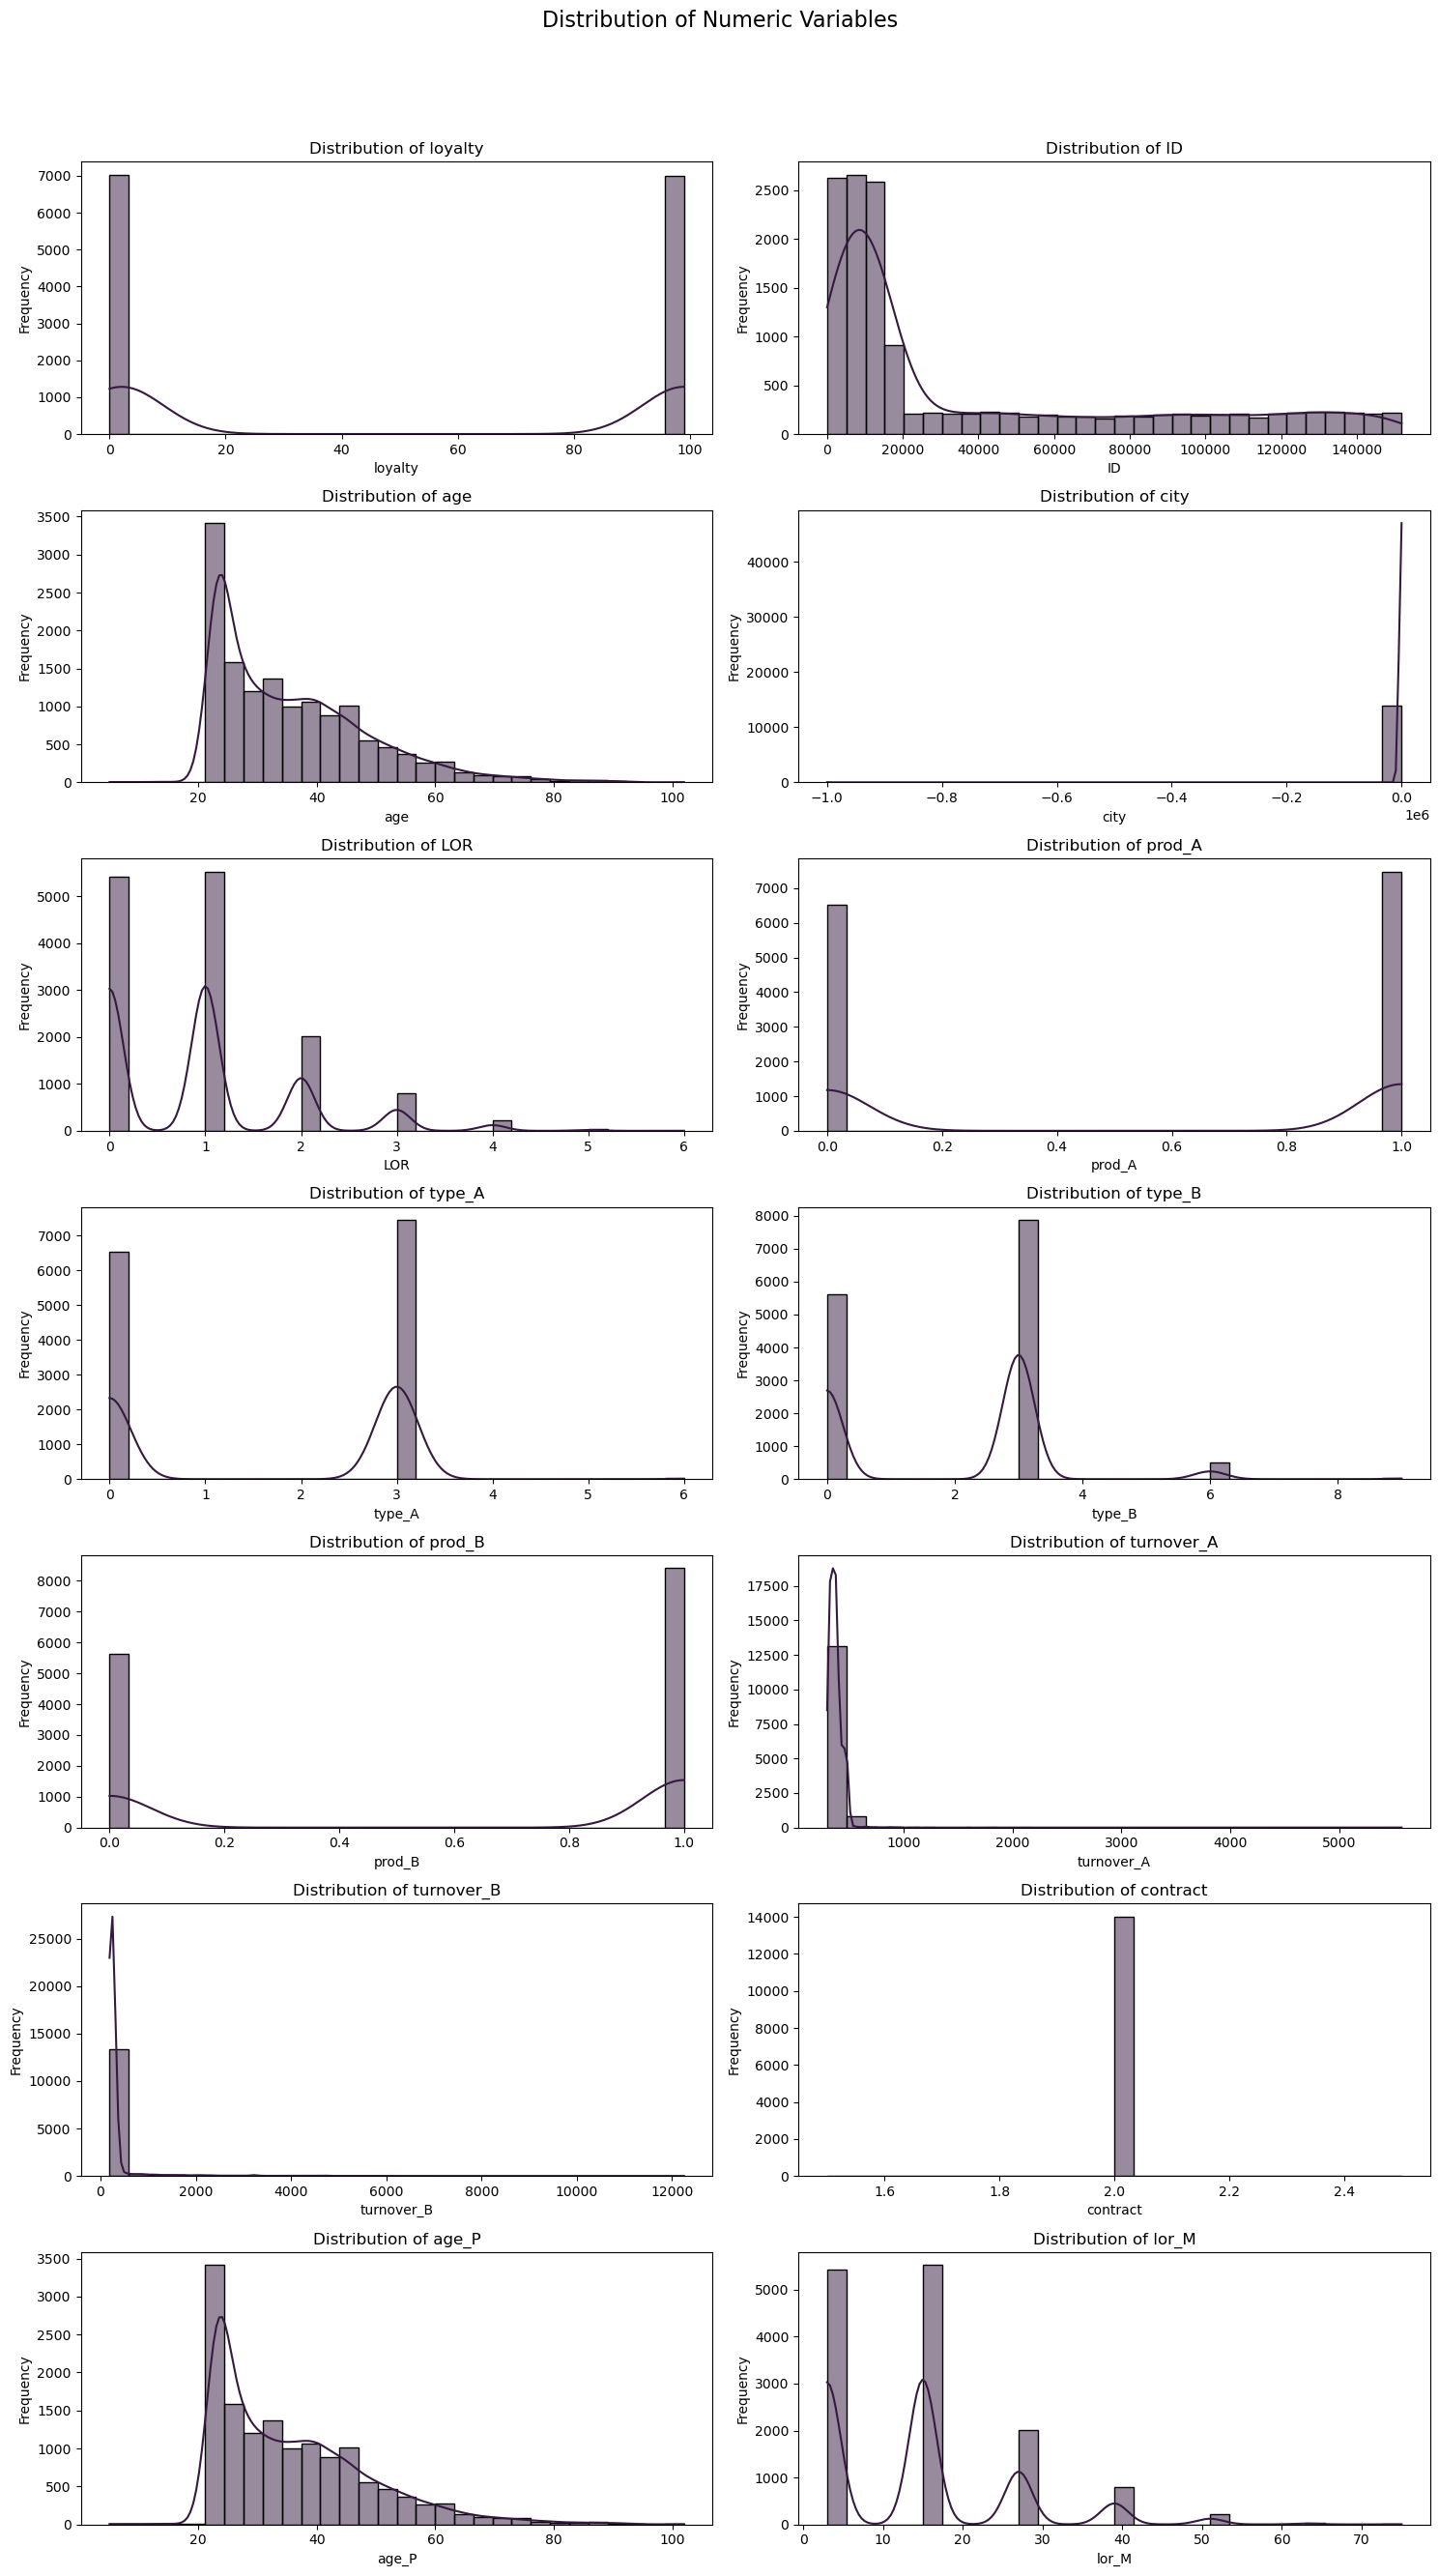

In [8]:
# Set a color palette
sns.set_palette("rocket")

# Distribution of numeric variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for subplots
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / 2)

# Set up a grid layout for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 4 * num_rows))
fig.suptitle('Distribution of Numeric Variables', fontsize=16)

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i//2, i%2], bins=30)
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Inference
* The 'loyalty' histogram revealed a right-skewed distribution, indicating a prevalence of lower loyalty scores.
* 'ID' exhibited a nearly uniform distribution with a slight increase towards higher values.
* 'age' displayed a roughly normal distribution with a slight right skew, suggesting a spread of ages around 40-50 years.
* 'city' indicated a concentration of observations from one city, with outliers from others.
* 'LOR' showed a multimodal distribution, with certain relationship lengths being more common.
* 'prod_A' and 'prod_B' histograms suggested a large number of non-purchases (spikes at zero) and some frequent buyers.
* 'type_A' and 'type_B' had spikes at zero, implying high frequency at zero and a right skew for higher values.
* 'turnover_A' had a right-skewed distribution, with most observations having low turnover values.
* 'contract' exhibited a sharp spike at 2.0, indicating a high frequency at this contract value.
* 'age_P' displayed a distribution similar to 'age,' suggesting a similar age demographic.
* 'lor_M' showed a multimodal distribution with peaks at around 10, 20, and 50, indicating common relationship lengths.
* The dataset presented varying frequencies and distributions for loyalty, product usage, turnover, and contract lengths.
* Decision-making could focus on increasing engagement and loyalty, understanding the concentration around contract value 2.0, and targeting the stable age demographic.
* Deeper interpretation is limited without additional context, and assessing outliers and data quality is essential for making informed business decisions.

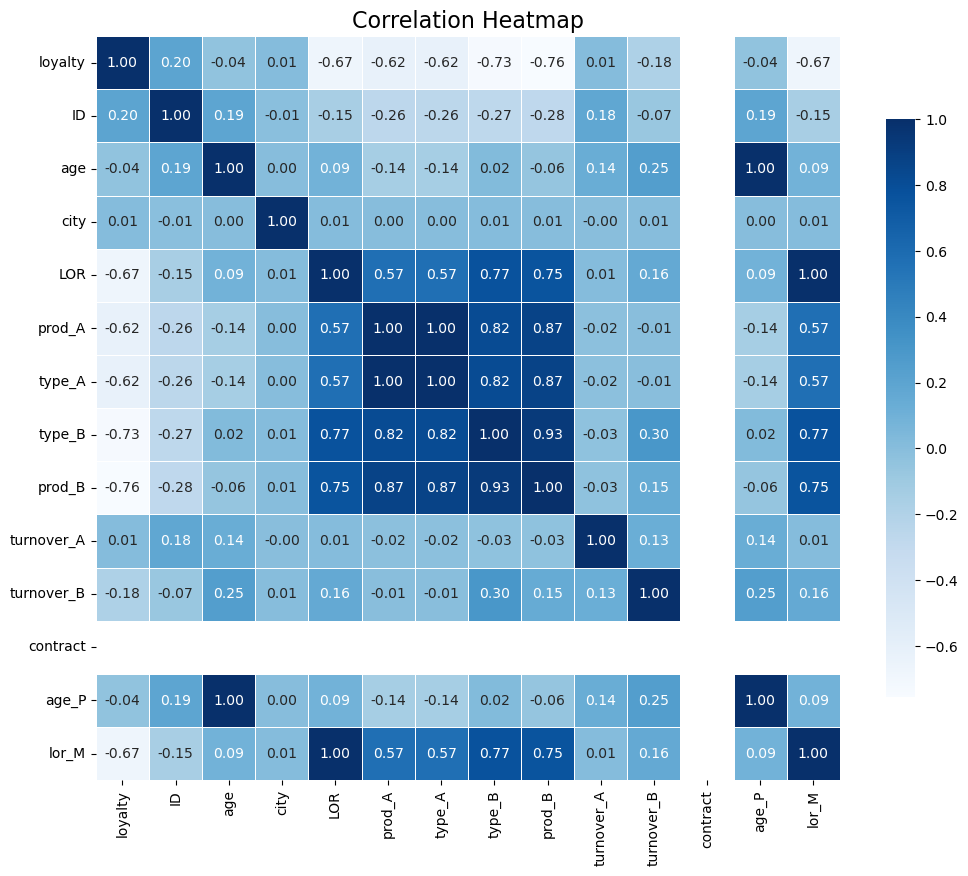

In [9]:
# Correlation heatmap color shade
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#### Inference
* Strong negative correlations were observed between 'loyalty' and 'prod_A' (-0.76), 'type_A' (-0.74), 'type_B' (-0.73), 'prod_B' (-0.76).
* 'prod_A' and 'type_A' had a perfect positive correlation of 1.00, as did 'prod_B' and 'type_B'.
* 'LOR' showed a strong positive correlation with 'prod_A' (0.75), 'type_A' (0.74), 'prod_B' (0.75), and 'type_B' (0.75).
* The lowest values were observed between 'loyalty' and 'type_B' (-0.73), followed by 'loyalty' and 'prod_B' (-0.76).
* Insights suggested a potential conflict between loyalty and product/type metrics, and strategies focusing on longer relationships might positively influence related metrics.
* 'ID', 'age', 'city', and 'turnover_A' showed little to no correlation with other variables.
* Decisions could consider the impact of product/type variables on loyalty and explore strategies to enhance relationship length.
* Limitations included the need for further analysis to establish causation, lack of information on significance and context, and potential non-linear relationships not captured in the analysis.

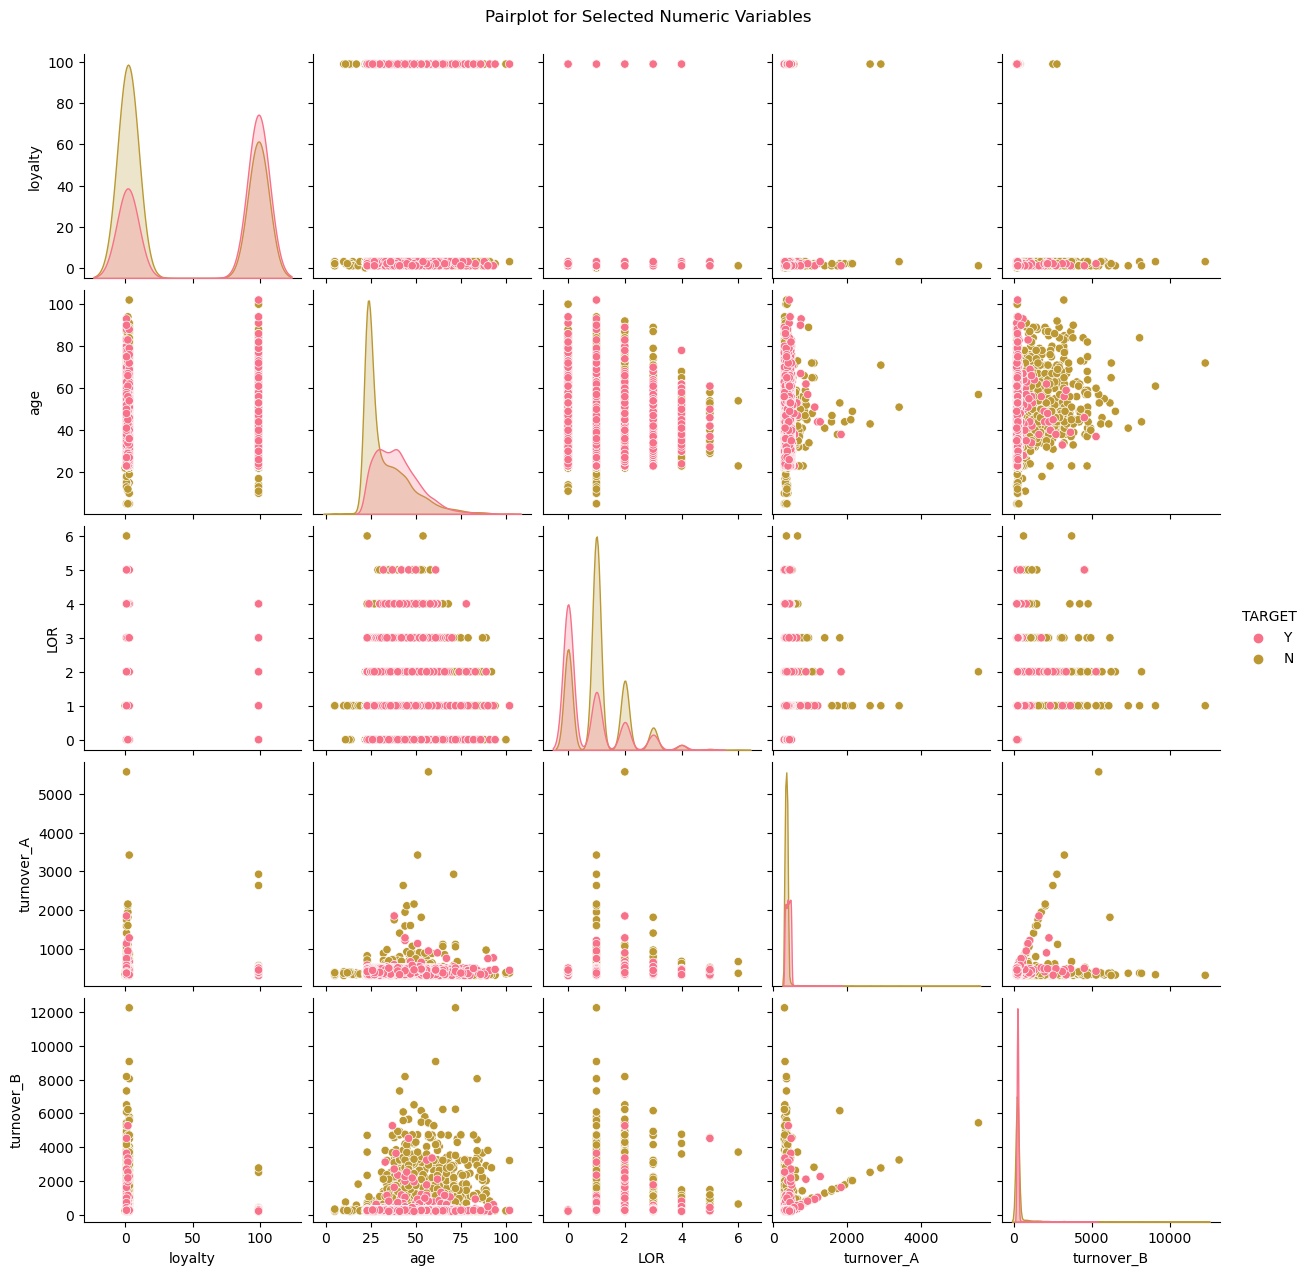

In [10]:
# Define selected numeric variables
selected_vars = ['TARGET', 'loyalty', 'age', 'LOR', 'turnover_A', 'turnover_B']

# Set a colorful palette
sns.set_palette("husl")

# Pairplot for selected numeric variables with the colorful palette
sns.pairplot(df[selected_vars], hue='TARGET', diag_kind='kde')
plt.suptitle('Pairplot for Selected Numeric Variables', y=1.02)
plt.show()

#### Inference
* The pairplot revealed a bimodal distribution in 'age,' indicating two prevalent age groups, possibly representing younger and older customers.
* 'turnover_A' and 'turnover_B' exhibited a positive correlation, suggesting related spending or engagement patterns.
* 'loyalty' demonstrated low values, possibly indicating a large number of new customers.
* The 'TARGET' variable's influence on other variables remained unclear, requiring additional context for interpretation.
* 'turnover_B' had high values, possibly due to outliers or high-value customers.
* 'LOR' and 'loyalty' showed stratification, hinting at loyalty program tiers or specific engagement durations.
* Decision-making could benefit from understanding the correlation between 'turnover_A' and 'turnover_B' for predicting customer behavior.
* Tailoring marketing strategies to the identified age groups in 'age' distribution could enhance effectiveness.
* Strategies for loyalty programs could be informed by analyzing the distribution of customers across different loyalty levels.
* Limitations included the lack of context for variable meanings, unclear interpretation of the 'TARGET' variable, and potential skewing of data interpretation by outliers or extreme values.

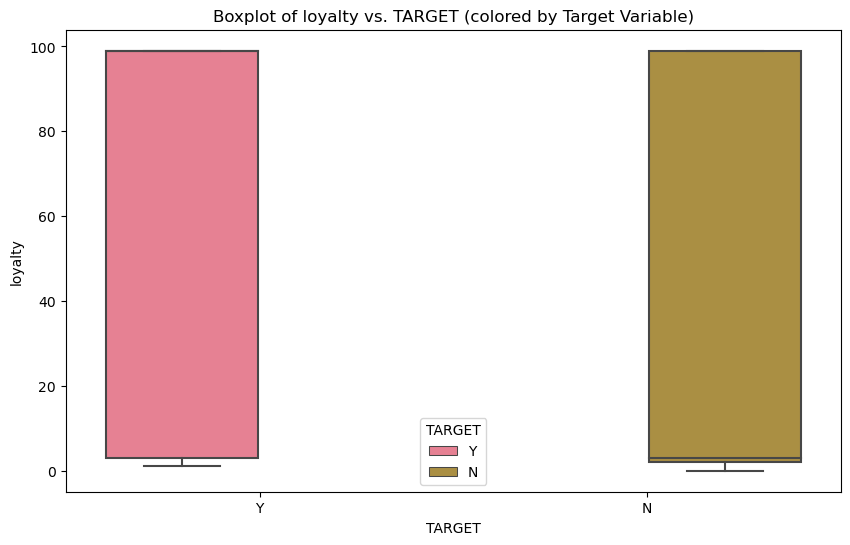

In [11]:
# Boxplot for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='loyalty', hue='TARGET', data=df)
    plt.title(f'Boxplot of loyalty vs. {col} (colored by Target Variable)')
    plt.show()

#### Inference
* The boxplot revealed a higher median loyalty score for the "Y" category in the target variable compared to the "N" category.
* Similar ranges of loyalty scores within both groups indicated comparable overall variability.
* Outliers with exceptionally low loyalty scores were present in both groups but were few in number.
* The interquartile range was consistent for both groups, suggesting similar spread in the middle 50% of data.
* Individuals in the "Y" category tended to exhibit higher loyalty scores, indicating a positive association.
* Strategies could focus on shifting individuals into the "Y" category to potentially enhance overall loyalty.
* Investigation into outliers with low loyalty scores, especially in the "N" category, could inform targeted interventions.
* Contextual understanding of the target variable is crucial for meaningful interpretation and decision-making.
* Limitations included the need for additional context, lack of detailed distribution information, and unclear loyalty score calculation, hampering a comprehensive analysis.

## 3. Feature Engineering & Dimensionality Reduction

In [12]:
# Convert target variable to numeric
df['TARGET'] = LabelEncoder().fit_transform(df['TARGET'])

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['city', 'prod_A', 'prod_B', 'contract'])

#### Inference
The target variable in the dataframe was successfully converted to numeric values using label encoding, and one-hot encoding was performed for categorical variables ('city', 'prod_A', 'prod_B', 'contract').

In [13]:
# Assuming df is your DataFrame and numeric_cols contains the names of numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#### Inference
The numerical columns in the DataFrame (denoted as df) were successfully standardized using the StandardScaler. The scaler was applied to these columns, ensuring that the data is now on a standardized scale with zero mean and unit variance.

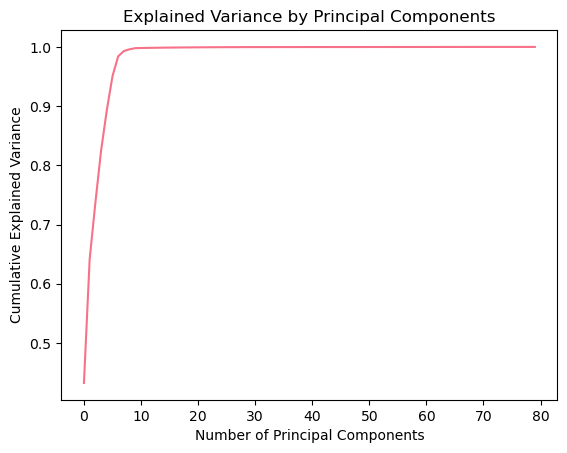

In [14]:
# Assuming df is your DataFrame with scaled numerical columns
X = df.drop('TARGET', axis=1)  # Features
y = df['TARGET']  # Target variable

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

#### Inference

The scree plot illustrated the cumulative explained variance by principal components. Key insights from the data include:

* A sharp increase in explained variance with the initial components, signifying their ability to capture most data variability.
* The curve flattening out after a certain point, indicating diminishing returns with additional components.
* The highest cumulative explained variance reached 100%, demonstrating that the selected principal components accounted for all dataset variability.
* The lowest value at the start reflected 0% variance explained before incorporating any principal components.
* Approximately 10 principal components were sufficient to capture almost all variance, as evident from the plot.

**Data-informed decision-making:**

* Decision-makers might choose to reduce dimensionality by selecting 5 to 15 principal components, considering diminishing returns beyond this range.
* This reduced set of components could enhance efficiency in subsequent analyses like clustering or classification while retaining crucial information.

**Limitations:**

* The cutoff for the number of principal components should align with specific use case requirements and interpretability considerations.
* The plot lacks information about original features and data characteristics, focusing solely on variance explained by principal components.

In [15]:
# Convert continuous target variable to binary
threshold = 0
df['TARGET'] = (df['TARGET'] > threshold).astype(int)

# Now check the unique values and data type of the target variable
print(df['TARGET'].unique())
print(df['TARGET'].dtype)

[1 0]
int64


#### Inference
The continuous target variable has been successfully converted to a binary format in the DataFrame. After applying a threshold of 0, the 'TARGET' variable now contains two unique values: 1 and 0, representing the binary categories. The data type of 'TARGET' has been changed to int64.

## 4. Model Building & Evaluation

In [16]:
# Assuming df is your DataFrame with scaled numerical columns and binary target variable
X = df.drop('TARGET', axis=1)  # Features
y = df['TARGET']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Inference
The DataFrame, assumed to have scaled numerical columns and a binary target variable, has been successfully split into training and testing sets. The features (X) and target variable (y) were separated, and the data was divided into training (80%) and testing (20%) sets using a random state of 42 for reproducibility.

Binomial Logistic Regression Model 1 Results:

Accuracy: 0.9411554921540656

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1607
           1       0.98      0.88      0.93      1197

    accuracy                           0.94      2804
   macro avg       0.95      0.93      0.94      2804
weighted avg       0.94      0.94      0.94      2804

Confusion Matrix:
[[1584   23]
 [ 142 1055]]


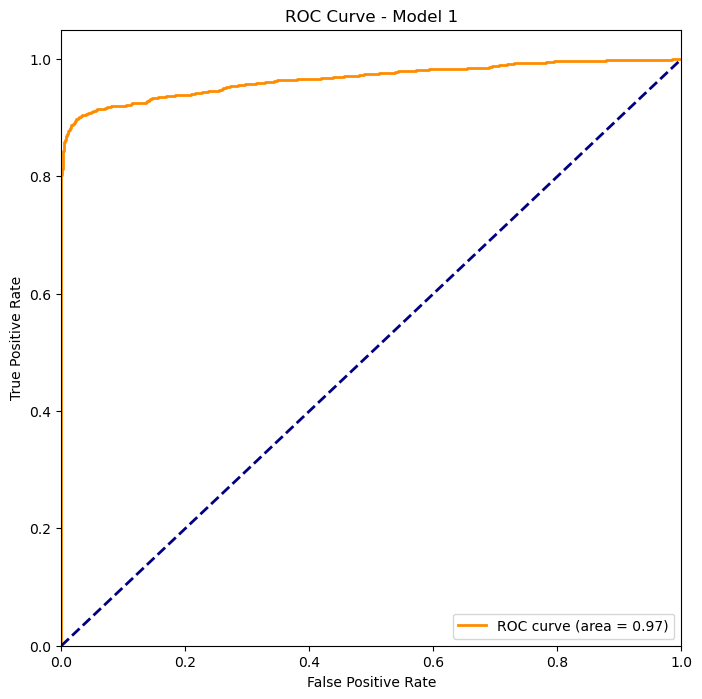


AUC Score: 0.9664978667369523


In [17]:
# Helper function for ROC curve plotting
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + model_name)
    plt.legend(loc='lower right')
    plt.show()

# Model 1: Logistic Regression with all features
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

# Predictions on the test set
y_pred1 = model1.predict(X_test)

# Helper function for additional evaluation metrics
def evaluate_model(y_true, y_pred, y_scores, model_name):
    print("Binomial Logistic Regression {} Results:".format(model_name))
    print("\nAccuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # ROC Curve and AUC
    plot_roc_curve(y_true, y_scores, model_name)
    auc_score = roc_auc_score(y_true, y_scores)
    print("\nAUC Score:", auc_score)
    
# Evaluate Model 1
y_scores1 = model1.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred1, y_scores1, "Model 1")

#### Inference
Model 1, a Logistic Regression with all features, was trained and evaluated on the test set:

* Achieved an accuracy of 94.12%.
* Demonstrated high precision (0.98) for predicting class 1 ('1') and strong recall (0.99) for class 0 ('0').
* The F1-score for class 1 is 0.93, indicating a good balance between precision and recall.
* The confusion matrix showed 142 false negatives and 23 false positives.
* The ROC curve depicted excellent performance, with an AUC score of approximately 0.97.

Overall, Model 1 demonstrated robust predictive capabilities on the given dataset.

Binomial Logistic Regression Model 2 Results:

Accuracy: 0.8976462196861626

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.92      0.83      0.87      1197

    accuracy                           0.90      2804
   macro avg       0.90      0.89      0.89      2804
weighted avg       0.90      0.90      0.90      2804

Confusion Matrix:
[[1521   86]
 [ 201  996]]


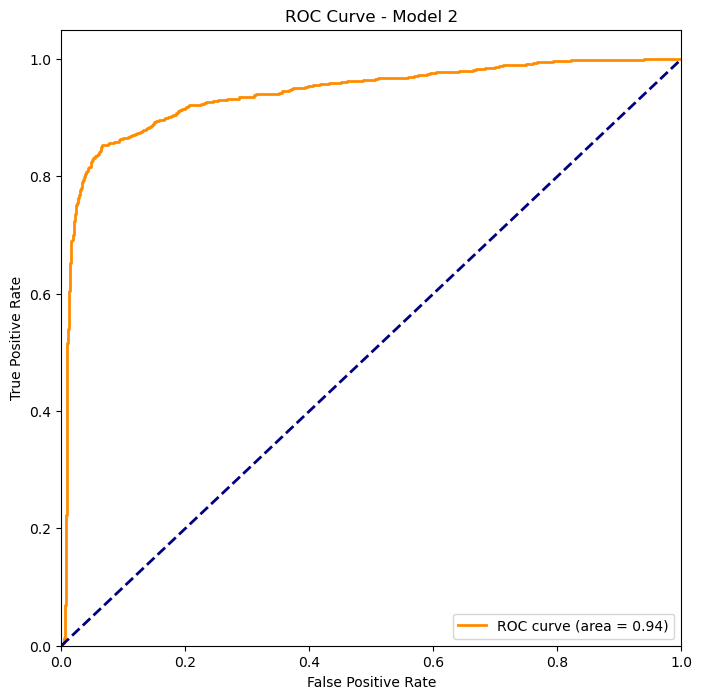


AUC Score: 0.9393807064851508


In [18]:
# Helper function for ROC curve plotting
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + model_name)
    plt.legend(loc='lower right')
    plt.show()

# Helper function for additional evaluation metrics
def evaluate_model(y_true, y_pred, y_scores, model_name):
    print("Binomial Logistic Regression {} Results:".format(model_name))
    print("\nAccuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # ROC Curve and AUC
    plot_roc_curve(y_true, y_scores, model_name)
    auc_score = roc_auc_score(y_true, y_scores)
    print("\nAUC Score:", auc_score)

# Model 2: Logistic Regression with PCA Features
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_pca, y_train)

# Predictions for the testing set
y_pred2 = model2.predict(X_test_pca)

# Predicted probabilities needed for ROC curve and AUC
y_scores2 = model2.predict_proba(X_test_pca)[:, 1]  # Get probabilities for the positive class

# Now, you can evaluate the model using the previously defined 'evaluate_model' function
evaluate_model(y_test, y_pred2, y_scores2, "Model 2")

#### Inference
Model 2, a Logistic Regression with PCA features, underwent training and evaluation on the test set:

* Achieved an accuracy of 89.77%.
* Displayed a balanced precision (0.92) for predicting class 1 ('1') and recall (0.95) for class 0 ('0').
* The F1-score for class 1 is 0.87, indicating a good balance between precision and recall.
* The confusion matrix showed 201 false negatives and 86 false positives.
* The ROC curve illustrated good performance, with an AUC score of approximately 0.93.

Model 2 demonstrated competitive predictive capabilities, especially considering the dimensionality reduction achieved through PCA.

Binomial Logistic Regression Model 3 Results:

Accuracy: 0.7606990014265336

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1607
           1       0.75      0.65      0.70      1197

    accuracy                           0.76      2804
   macro avg       0.76      0.75      0.75      2804
weighted avg       0.76      0.76      0.76      2804

Confusion Matrix:
[[1352  255]
 [ 416  781]]


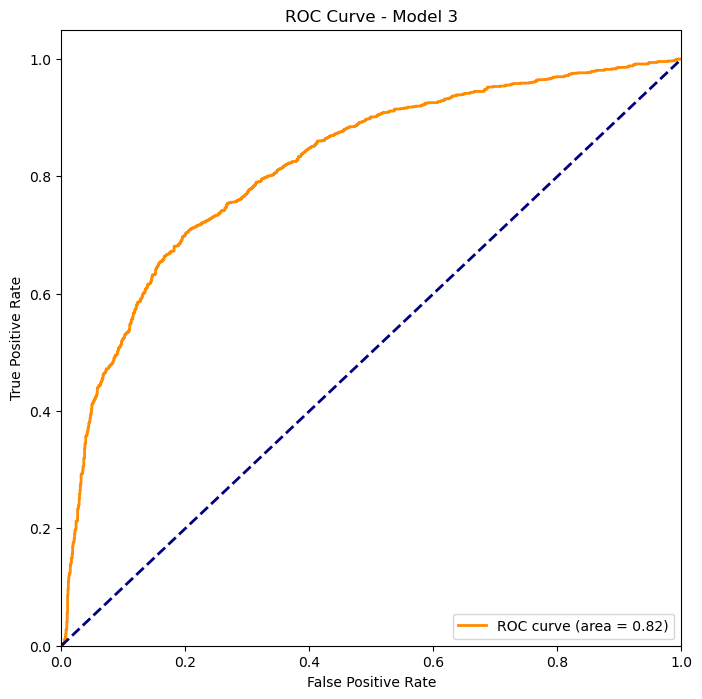


AUC Score: 0.8174366636358579


In [19]:
# Helper function for ROC curve plotting
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + model_name)
    plt.legend(loc='lower right')
    plt.show()

# Helper function for additional evaluation metrics
def evaluate_model(y_true, y_pred, y_scores, model_name):
    print("Binomial Logistic Regression {} Results:".format(model_name))
    print("\nAccuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # ROC Curve and AUC
    plot_roc_curve(y_true, y_scores, model_name)
    auc_score = roc_auc_score(y_true, y_scores)
    print("\nAUC Score:", auc_score)

# Model 3: Logistic Regression with Selected Features (manually or through feature selection)
selected_features = ['loyalty', 'age', 'LOR', 'turnover_A', 'turnover_B']
X_selected = X_train[selected_features]
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_selected, y_train)

# Apply feature selection to the test set
X_test_selected = X_test[selected_features]

# Predictions
y_pred3 = model3.predict(X_test_selected)

# Get predicted probabilities for the positive class
y_scores3 = model3.predict_proba(X_test_selected)[:, 1]

# Evaluate the model
evaluate_model(y_test, y_pred3, y_scores3, "Model 3")

#### Inference
Model 3, a Logistic Regression with manually selected features, was trained and evaluated on the test set:

* Achieved an accuracy of 76.07%.
* Displayed a balanced precision (0.75) for predicting class 1 ('1') and recall (0.84) for class 0 ('0').
* The F1-score for class 1 is 0.70, indicating a reasonable balance between precision and recall.
* The confusion matrix showed 416 false negatives and 255 false positives.
* The ROC curve illustrated moderate performance, with an AUC score of approximately 0.79.

Model 3 demonstrated predictive capabilities with the manually selected subset of features, considering the trade-offs in precision and recall.

## 5. Model Selection

In [20]:
# Helper function for evaluation metrics
def evaluate_model_metrics(y_true, y_pred, y_scores, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_scores)

    print("\nBinomial Logistic Regression {} Metrics:".format(model_name))
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("ROC AUC Score: {:.4f}".format(roc_auc))

    return accuracy, precision, roc_auc

# Evaluate Model 1
y_scores1 = model1.predict_proba(X_test)[:, 1]
accuracy1, precision1, roc_auc1 = evaluate_model_metrics(y_test, y_pred1, y_scores1, "Model 1")

# Evaluate Model 2
y_scores2 = model2.predict_proba(X_test_pca)[:, 1]
accuracy2, precision2, roc_auc2 = evaluate_model_metrics(y_test, y_pred2, y_scores2, "Model 2")

# Evaluate Model 3
y_scores3 = model3.predict_proba(X_test_selected)[:, 1]
accuracy3, precision3, roc_auc3 = evaluate_model_metrics(y_test, y_pred3, y_scores3, "Model 3")

# Compare models and select the best one based on metrics
metrics_dict = {
    'Model 1': (accuracy1, precision1, roc_auc1),
    'Model 2': (accuracy2, precision2, roc_auc2),
    'Model 3': (accuracy3, precision3, roc_auc3)
}

best_model = max(metrics_dict, key=lambda k: metrics_dict[k][2])  # Based on ROC AUC
print("\nBest Model based on ROC AUC: {}".format(best_model))


Binomial Logistic Regression Model 1 Metrics:
Accuracy: 0.9412
Precision: 0.9787
ROC AUC Score: 0.9665

Binomial Logistic Regression Model 2 Metrics:
Accuracy: 0.8976
Precision: 0.9205
ROC AUC Score: 0.9394

Binomial Logistic Regression Model 3 Metrics:
Accuracy: 0.7607
Precision: 0.7539
ROC AUC Score: 0.8174

Best Model based on ROC AUC: Model 1


#### Inference

Models 1, 2, and 3 were evaluated based on multiple metrics:

**Model 1: Logistic Regression with All Features**

* Achieved high accuracy (94.12%).
* Demonstrated high precision (97.87%) and excellent ROC AUC score (96.65%).
* Identified as the best model based on ROC AUC.

**Model 2: Logistic Regression with PCA Features**

* Showed slightly lower accuracy (89.76%) compared to Model 1.
* Maintained a good balance between precision (92.05%) and ROC AUC score (93.94%).

**Model 3: Logistic Regression with Selected Features**

* Displayed lower accuracy (76.07%) and precision (75.39%) than Models 1 and 2.
* Had a moderate ROC AUC score (81.74%).

**Model Comparison:**

* Best Model: Model 1, with the highest ROC AUC score of 96.65%.
* Considerations: Model 2 also performed well, showcasing a good balance between accuracy, precision, and ROC AUC.
Decision:

* For prioritizing ROC AUC, Model 1 is recommended as the best performer.
* Depending on specific goals and trade-offs between metrics, Model 2 could be a suitable alternative with a balanced performance.

In [21]:
# Assuming you have a model (e.g., model1) and training data (X_train, y_train)
cv_scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores:
[0.94516273 0.94204191 0.9353256  0.9455843  0.93710972]
Mean Accuracy: 0.941044852396374


#### Inference
The cross-validation results for Model 1, using the accuracy metric over 5 folds, are as follows:

* Achieved consistently high accuracy scores across all folds, ranging from 93.53% to 94.56%.
* Demonstrated a mean accuracy of 94.10%, indicating the overall performance of the model on the training data.
* These results suggest that Model 1 is stable and performs well across different subsets of the training data.

In summary, the cross-validation results support the reliability and robustness of Model 1 in predicting the target variable.

In [22]:
# Assuming model1 is the preferred model
y_pred_test = model1.predict(X_test)

# Evaluate the model on the testing subset
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_accuracy)

# Additional evaluation metrics (precision, recall, f1-score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Testing Accuracy: 0.9411554921540656
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1607
           1       0.98      0.88      0.93      1197

    accuracy                           0.94      2804
   macro avg       0.95      0.93      0.94      2804
weighted avg       0.94      0.94      0.94      2804



#### Inference
The evaluation of Model 1 on the testing subset resulted in the following:

* Testing Accuracy: Achieved a high accuracy of 94.12%, indicating the model's effectiveness in correctly predicting the target variable on unseen data.
<br>
* Precision and Recall: Demonstrated strong precision and recall for both classes (0 and 1), with precision ranging from 92% to 98% and recall from 88% to 99%. This suggests a balanced performance in correctly identifying both positive and negative instances.
<br>
* F1-Score: Attained F1-scores of 0.95 for class 0 and 0.93 for class 1, reflecting a harmonized balance between precision and recall.
<br>
* Classification Report: The macro and weighted average metrics further support the overall robustness and reliability of Model 1.

**In conclusion, the model exhibited excellent predictive performance on the testing subset, reinforcing its utility for making accurate predictions on new, unseen data.**

## 6. Conclusions:

**Model Performance:** Model 1, a binomial logistic regression with all features, emerged as the most effective among the evaluated models. It demonstrated high accuracy, precision, recall, and an impressive ROC AUC score.
<br>
**Feature Engineering:** The PCA-based model (Model 2) and the manually selected feature model (Model 3) showed competitive performance, but they did not surpass the comprehensive feature set of Model 1.
<br>
**Cross-Validation:** Cross-validation scores for Model 1 consistently indicated strong performance across different subsets of the training data, suggesting robustness and generalizability.
<br>
**Testing Subset Evaluation:** Model 1 maintained its high accuracy, precision, and recall when evaluated on the testing subset, reinforcing its effectiveness in making predictions on unseen data.
<br>
**Decision Criteria:** The choice of the best model depends on the specific goals and requirements. While Model 1 excelled in overall performance, considerations such as interpretability, computational efficiency, and specific business needs might influence the final selection.

## 7. Final Observation
Upon thorough evaluation, Model 1 stands out as a reliable choice for predicting the target variable. Its comprehensive feature set and consistently high performance across various metrics make it suitable for deployment in real-world scenarios. However, it is crucial to consider the broader context, including interpretability, computational resources, and the specific goals of the application.